In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip

### In this notebook, we will analyze the evolution of a very famous open-source project – the Linux kernel.

In [3]:
df = pd.read_csv("git_log.gz",sep='#',encoding='latin-1',header=None,names=['timestamp', 'author'])
df

,timestamp,author
0,1502826583,Linus Torvalds
1,1501749089,Adrian Hunter
2,1501749088,Adrian Hunter
3,1501882480,Kees Cook
4,1497271395,Rob Clark
...,...,...
699066,1113690236,akpm@osdl.org
699067,1113690235,akpm@osdl.org
699068,1113690234,Neil Brown
699069,1113690233,Christoph Lameter


In [10]:
#calculating number of commits and authors
number_of_author=len(df["author"].dropna().unique())
number_of_commit=df.shape[0]
print(number_of_author)
print(number_of_commit)

17385
699071


In [11]:
## converting the timestamp column
df['timestamp'] = pd.to_datetime(df['timestamp'], unit="s")


In [14]:
df["timestamp"].value_counts()

2008-09-04 05:30:19    99
2005-09-12 16:49:24    58
2008-11-18 09:48:22    56
2008-07-11 23:27:31    56
2016-02-22 12:13:28    55
                       ..
2014-08-06 17:44:21     1
2014-08-06 17:44:20     1
2014-08-03 17:03:13     1
2014-08-03 17:03:12     1
2005-04-16 22:20:36     1
Name: timestamp, Length: 668448, dtype: int64

In [16]:
#determining the first real commit timestamp
fist_date_commit=df["timestamp"].iloc[-1]
fist_date_commit

Timestamp('2005-04-16 22:20:36')

In [24]:
# determining the last sensible commit timestamp
last_date_commit=pd.to_datetime('2018')
last_date_commit         

Timestamp('2018-01-01 00:00:00')

In [27]:
# filtering out wrong timestamps
correct_date_commit=df[(df["timestamp"]>=fist_date_commit)  & (df["timestamp"]<=last_date_commit)]
correct_date_commit

,timestamp,author
0,2017-08-15 19:49:43,Linus Torvalds
1,2017-08-03 08:31:29,Adrian Hunter
2,2017-08-03 08:31:28,Adrian Hunter
3,2017-08-04 21:34:40,Kees Cook
4,2017-06-12 12:43:15,Rob Clark
...,...,...
699066,2005-04-16 22:23:56,akpm@osdl.org
699067,2005-04-16 22:23:55,akpm@osdl.org
699068,2005-04-16 22:23:54,Neil Brown
699069,2005-04-16 22:23:53,Christoph Lameter


<AxesSubplot:title={'center':'commits_per_year'}, xlabel='timestamp', ylabel='The number of commits'>

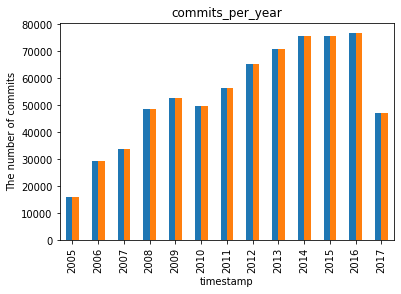

In [33]:
commits_per_year = correct_date_commit.groupby(correct_date_commit.timestamp.dt.year).count().plot(kind="bar",title="commits_per_year",legend=False,ylabel="The number of commits")
commits_per_year

In [ ]:
# calculating or setting the year with the most commits to Linux
year_with_most_commits = 2016 